In [79]:
import numpy as np
from tqdm import tqdm
import os
import pickle

# import sys
# sys.path.insert(1, '../MyFunc')
# from MyFunc.myDict import order_folders, order_dimension, COSMOPAR, VarCosmoPar, fiducial_vals, cosmological_pars
# from MyFunc.name_parser import info_name, cosmo_parser
# from MyFunc.Fisher import correlation_matrix, Hartlap, JacobCosmPar

In [80]:
def info_name(name):
    """Obtain realization information from namefile"""
    print("TYPE: ", type(name))
    info = name.split('_')[-3:]
    print("TYPE: ", info, "\n", type(info))
    info[2] = info[2].replace(".wst", "")
    N_hgrid = info[0]
    N_WSTgrid = info[1]
    n_realiz = info[2].replace(".wst", "")
    
    return [int(N_hgrid), int(N_WSTgrid), int(n_realiz)]

def cosmo_parser(name):
    """Obtain cosmology from .wst file"""
    info = name.split('_')
    if info[0] == "fiducial":
        return info[0]
    elif info[0] == "zeldovich":
        return info[0]
    else:
        return info[0] + "_" + info[1]

In [81]:
root = "/home/fuffolo97/TESI/"
raw_files = os.listdir(root+"WST-files_08_08/WST-files_08_08")
# files with big grid in normal and redshift space
b_n_files, b_r_files = [], []
# # files with small grid in normal and redshift space
# s_n_files, s_r_files = [], []
for i in range(len(raw_files)):
    if "400" in raw_files[i]:
        if "_Ns_" in raw_files[i]: 
            b_n_files.append(raw_files[i])
        if "_RDs_" in raw_files[i]:
            b_r_files.append(raw_files[i])
    # if "256" and "_Ns_" in raw_files[i]: s_n_files.append(raw_files[i])
    # if "256" and "_RDs_" in raw_files[i]: s_r_files.append(raw_files[i])

In [82]:
b_n_files

['Ob2_p_coefficients_M_Ns_s08_q08_400_350.wst',
 'Ob2_m_coefficients_M_Ns_s08_q08_400_350.wst',
 'fiducial_coefficients_M_Ns_s08_q08_400_1000.wst']

In [83]:
with open(root+"WST-files_08_08/WST-files_08_08/"+b_n_files[2], "rb") as f:
    fiducial_b_n = pickle.load(f)
with open(root+"WST-files_08_08/WST-files_08_08/"+"fiducial_coefficients_M_Ns_s08_q08_256_1000.wst", "rb") as f:
    fiducial_s_n = pickle.load(f)

In [84]:
import matplotlib.pyplot as plt

Text(0.5, 1.0, 'Coefficienti di scattering')

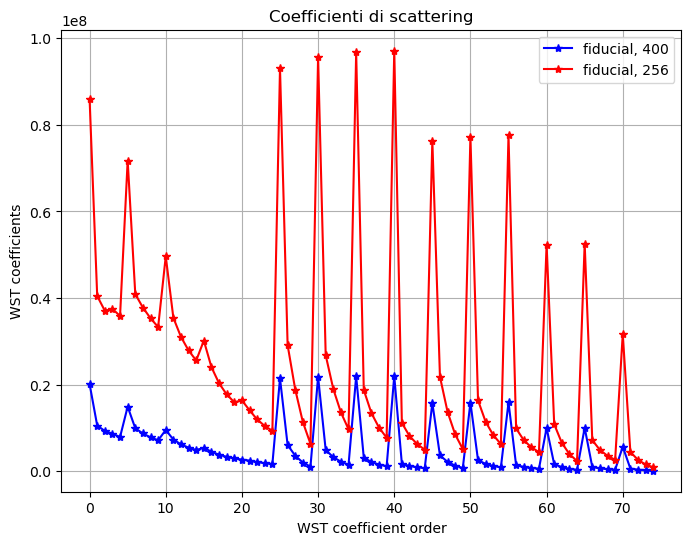

In [85]:
plt.figure(figsize=(8,6))
plt.plot(np.arange(75), fiducial_s_n, marker="*", color="Blue", label="fiducial, 400")
plt.plot(np.arange(75), fiducial_b_n, marker="*", color="Red", label="fiducial, 256")
plt.grid()
plt.legend()
plt.xlabel("WST coefficient order")
plt.ylabel("WST coefficients")
plt.title("Coefficienti di scattering")

Text(0.5, 1.0, 'Rapporto tra coeff. di scattering a griglia diversa')

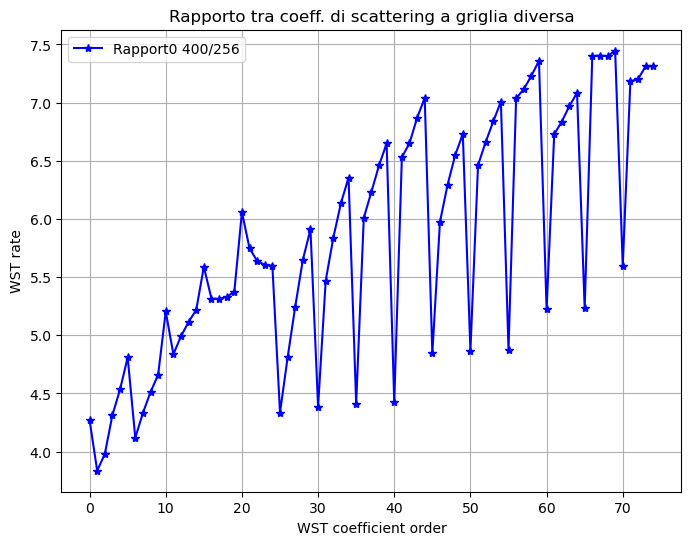

In [86]:
rate = []
for i in range(len(fiducial_b_n)):
    rate.append(fiducial_b_n[i]/fiducial_s_n[i])

plt.figure(figsize=(8,6))
plt.plot(np.arange(75), rate, marker="*", color="Blue", label="Rapport0 400/256")
plt.grid()
plt.legend()
plt.xlabel("WST coefficient order")
plt.ylabel("WST rate")
plt.title("Rapporto tra coeff. di scattering a griglia diversa")

Text(0.5, 1.0, 'Incremento dei coeff.')

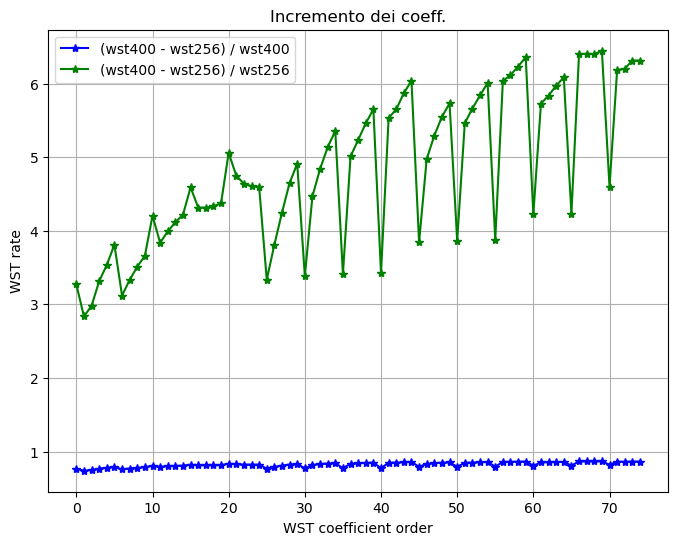

In [87]:
rate_2 = []
rate_3 = []
for i in range(len(fiducial_b_n)):
    rate_2.append((fiducial_b_n[i] - fiducial_s_n[i])/fiducial_b_n[i])
    rate_3.append((fiducial_b_n[i] - fiducial_s_n[i])/fiducial_s_n[i])

plt.figure(figsize=(8,6))
plt.plot(np.arange(75), rate_2, marker="*", color="Blue", label="(wst400 - wst256) / wst400")
plt.plot(np.arange(75), rate_3, marker="*", color="Green", label="(wst400 - wst256) / wst256")
plt.grid()
plt.legend()
plt.xlabel("WST coefficient order")
plt.ylabel("WST rate")
plt.title("Incremento dei coeff.")

Text(0.5, 1.0, 'Incremento dei coeff.')

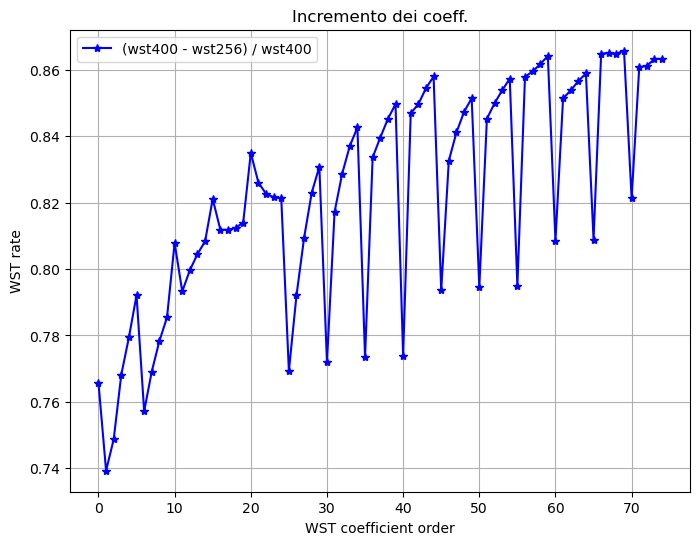

In [88]:
rate_4 = []
for i in range(len(fiducial_b_n)):
    rate_4.append((fiducial_b_n[i] - fiducial_s_n[i])/fiducial_b_n[i])

plt.figure(figsize=(8,6))
plt.plot(np.arange(75), rate_4, marker="*", color="Blue", label="(wst400 - wst256) / wst400")
plt.grid()
plt.legend()
plt.xlabel("WST coefficient order")
plt.ylabel("WST rate")
plt.title("Incremento dei coeff.")

Text(0.5, 1.0, 'Differenza tra coeff. di scattering a griglia diversa')

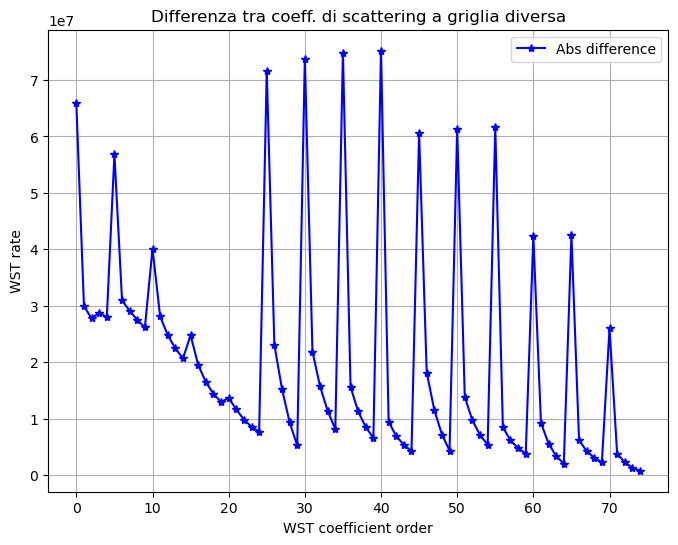

In [89]:
diff = []
for i in range(len(fiducial_b_n)):
    diff.append(np.abs(fiducial_b_n[i] - fiducial_s_n[i]))

plt.figure(figsize=(8,6))
plt.plot(np.arange(75), diff, marker="*", color="Blue", label="Abs difference")
plt.grid()
plt.legend()
plt.xlabel("WST coefficient order")
plt.ylabel("WST rate")
plt.title("Differenza tra coeff. di scattering a griglia diversa")

In [90]:
fiducials_b_n = []
with open(root+"WST-files_08_08/WST-files_08_08/"+b_n_files[2], "rb") as file:
    while True:
        try:
            fiducials_b_n.append(pickle.load(file))
        except EOFError:
            break

fiducials_s_n = []
with open(root+"WST-files_08_08/WST-files_08_08/"+"fiducial_coefficients_M_Ns_s08_q08_256_1000.wst", "rb") as file:
    while True:
        try:
            fiducials_s_n.append(pickle.load(file))
        except EOFError:
            break

In [91]:
print("len(fiducials_b_n): ", len(fiducials_b_n))
len(fiducials_b_n[92])

len(fiducials_b_n):  93


75

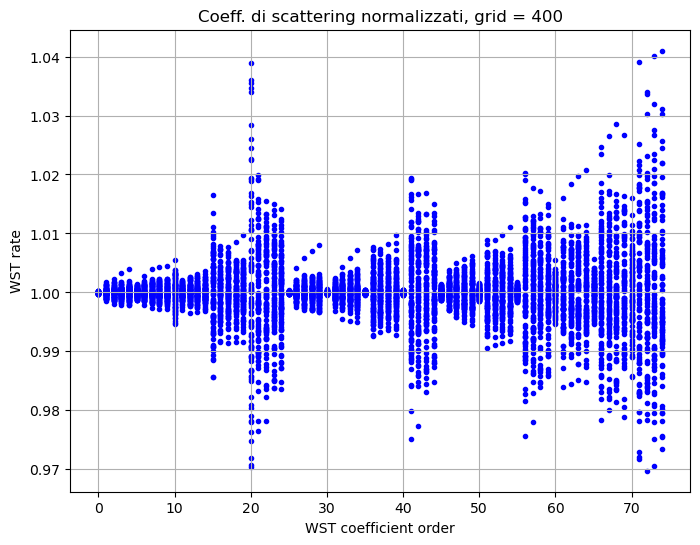

In [92]:
avg_fid_b = np.average(fiducials_b_n, axis=0)

plt.figure(figsize=(8,6))
for i in range(len(fiducials_b_n)):
    plt.scatter(np.arange(75), fiducials_b_n[i]/avg_fid_b, marker=".", color="Blue")
plt.grid()
plt.xlabel("WST coefficient order")
plt.ylabel("WST rate")
plt.title("Coeff. di scattering normalizzati, grid = 400");

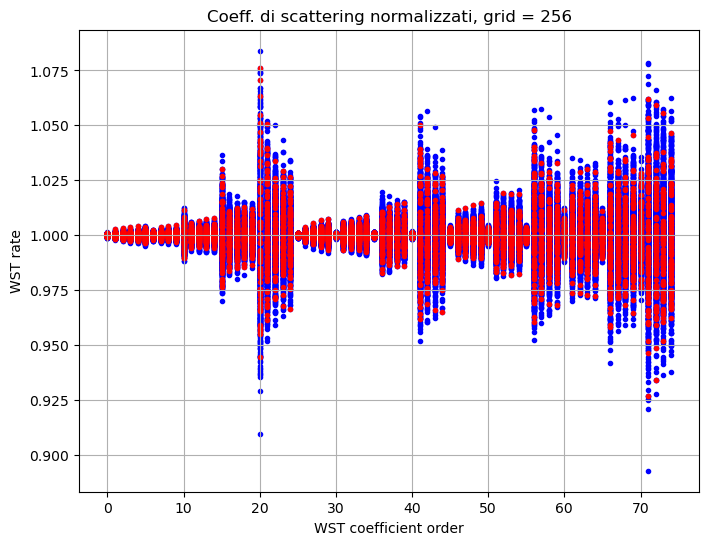

In [93]:
avg_fid_s = np.average(fiducials_s_n, axis=0)

plt.figure(figsize=(8,6))
for i in range(len(fiducials_s_n)):
    plt.scatter(np.arange(75), fiducials_s_n[i]/avg_fid_s, marker=".", color="Blue", label="Complete set")
for i in range(len(fiducials_b_n)):
    plt.scatter(np.arange(75), fiducials_s_n[i]/avg_fid_s, marker=".", color="Red", label="Minor set")
plt.grid()
plt.xlabel("WST coefficient order")
plt.ylabel("WST rate")
plt.title("Coeff. di scattering normalizzati, grid = 256");

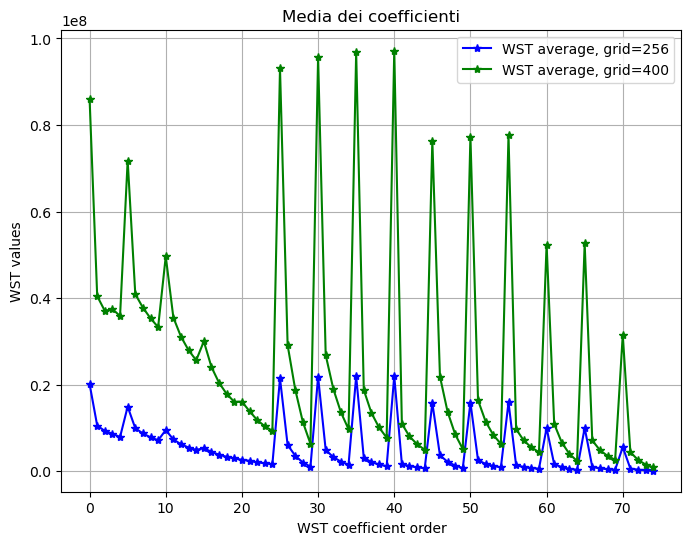

In [94]:
plt.figure(figsize=(8,6))
plt.plot(np.arange(75), avg_fid_s, marker="*", color="Blue", label="WST average, grid=256")
plt.plot(np.arange(75), avg_fid_b, marker="*", color="Green", label="WST average, grid=400")
plt.grid()
plt.legend()
plt.xlabel("WST coefficient order")
plt.ylabel("WST values")
plt.title("Media dei coefficienti");

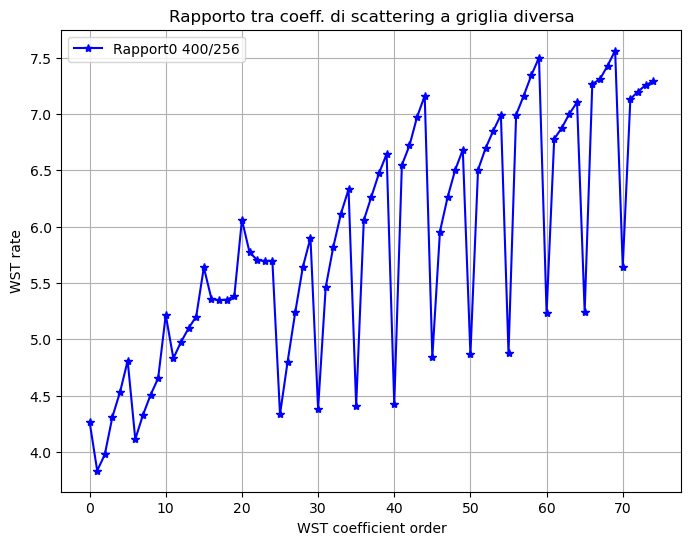

In [95]:
rate = []
for i in range(len(fiducial_b_n)):
    rate.append(avg_fid_b[i]/avg_fid_s[i])

plt.figure(figsize=(8,6))
plt.plot(np.arange(75), rate, marker="*", color="Blue", label="Rapport0 400/256")
plt.grid()
plt.legend()
plt.xlabel("WST coefficient order")
plt.ylabel("WST rate")
plt.title("Rapporto tra coeff. di scattering a griglia diversa");

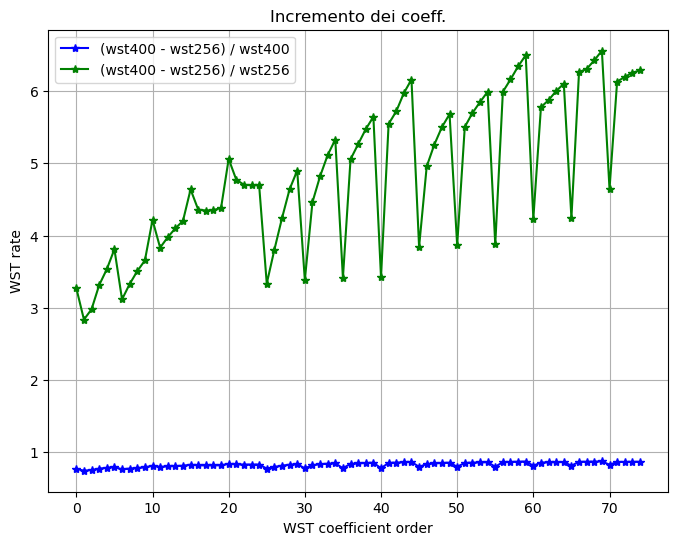

In [96]:
rate_2 = []
rate_3 = []
for i in range(len(fiducial_b_n)):
    rate_2.append((avg_fid_b[i] - avg_fid_s[i])/avg_fid_b[i])
    rate_3.append((avg_fid_b[i] - avg_fid_s[i])/avg_fid_s[i])

plt.figure(figsize=(8,6))
plt.plot(np.arange(75), rate_2, marker="*", color="Blue", label="(wst400 - wst256) / wst400")
plt.plot(np.arange(75), rate_3, marker="*", color="Green", label="(wst400 - wst256) / wst256")
plt.grid()
plt.legend()
plt.xlabel("WST coefficient order")
plt.ylabel("WST rate")
plt.title("Incremento dei coeff.");

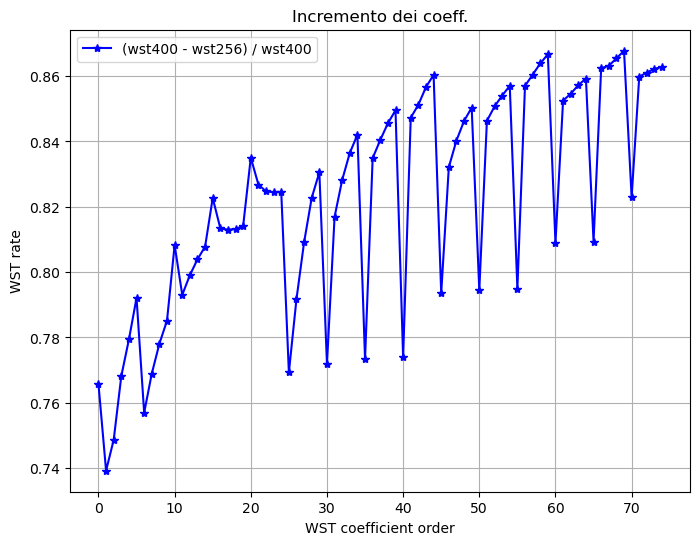

In [97]:
assert len(rate_2) == 75, f"it's {len(rate_2)}"
plt.figure(figsize=(8,6))
plt.plot(np.arange(75), rate_2, marker="*", color="Blue", label="(wst400 - wst256) / wst400")
plt.grid()
plt.legend()
plt.xlabel("WST coefficient order")
plt.ylabel("WST rate")
plt.title("Incremento dei coeff.");